Importamos las librerías necesarias:

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import bird_utils as fbu

Definimos las funciones de activación que utilizaremos:

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def binary(x):
    return x[0] > 0.5

Creamos el diccionario con todos los parámetros:

In [3]:
                 # Parámetros físicos
settings_dict = {'GRAVITY': -1,        # Aceleración de la gravedad
                 'VX': -1,             # Velocidad horizontal del pájaro
                 'DT': 0.1,            # Unidad de tiempo
                 'MIN_VELOCITY': -1.2, # Velocidad vertical mínima del pájaro (qué tan rápido puede caer)
    
                 # Parámetros del mundo
                 'TOP': 8,            # Altura del mundo
                 'RIGHT': 10,         # Ancho del mundo
                 'PIPE_GAP': 2.5,     # Tamaño del espacio entre tuberías
                 'MINIMUM_HEIGHT': 2, # Mínima separación entre la tubería y el piso/techo
                 'PIPE_WIDTH': 1,     # Ancho de las tuberías
                 'BIRD_RADIUS': 0.3,  # Radio del pájaro
                 'FLAP_SPEED': 1.3,   # Velocidad que adquiere el pájaro cuando aletea
                 'MAX_STEPS': 5000,   # Máximo número de unidades de tiempo que pueden estar vivos los pájaros
    
                 # Recompensas y penalizaciones 
                 'DEATH_PENALTY': 0,   # Penalización por morir
                 'ALIVE_REWARD': 0.05, # Recompensa por estar vivo una unidad de tiempo
                 'PIPE_REWARD': 1,     # Recompensa por pasar una tubería
    
                 # Parámetros genéticos
                 'MUTATION': 0.03,          # Porcentaje del genoma total de los hijos a mutar
                 'CROSSOVER': 0.8,          # Porcentaje de la población nueva que será producto de crossover
                 'ELITISM': 0.1,            # Porcentaje de la población que serán copias exactas de las mejores entidades
                 'SELECTION': 'tournament', # Método de selección
                 'CONTESTANTS': 8,          # Número de participantes en el torneo (en caso de SELECTION=tournament)
                 
                 # Parámetros de la red de los pájaros
                 'LAYER_SIZES': [2,6,1],              # Tamaños de cada capa. Añadir más elementos para añadir más capas                 
                 'ACTIVATION_FUNCTIONS': [sigmoid]*2, # Funciones de activación de cada capa, exceptuando la última
                 'LAST_ACTIVATION': binary            # Función de activación de la última capa
}

Creamos el objeto entrenador:

In [5]:
trainer = fbu.Trainer(settings=settings_dict, # configuración
                      processes=4,            # número de procesos paralelos
                      birds=40)               # número de pájaros

Entrenamos los pájaros por un cierto número de generaciones:

In [8]:
birds, fitness_history = trainer.train(generations=50, verbose=True)

El fitness de cada pájaro en cada generación está en `fitness_history`. Sacamos su promedio y graficamos:

Text(0, 0.5, 'Fitness promedio')

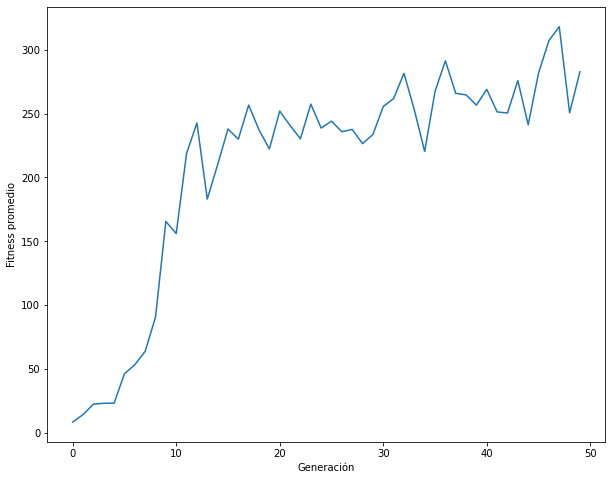

In [13]:
means = np.mean(fitness_history, axis=1)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(means)
ax.set_xlabel("Generación")
ax.set_ylabel("Fitness promedio")

Generamos un nuevo mundo con los mejores pájaros de la última generación:

In [14]:
world = fbu.best_world(birds, settings_dict, n_birds=2)

Simulamos el mundo y guardamos las imágenes en una carpeta:

In [ ]:
world.play(draw=True, path="./frames", max_steps=500)